<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

A palavra com maior peso na história da humanidade é o **DINHEIRO**, por quê?

Desde que os primeiros grupos de pessoas estabeleceram relações sociais, o **dinheiro** estava presente ali, mesmo que não fosse em forma de uma moeda, mas algo que representava um certo **poder de barganha**. 

<center><img alt="Escambo"  src='https://voyager1.net/wp-content/uploads/2017/07/escambo-medievo-750x400.jpg'></center>

Daquele momento em diante, aquilo que era considerado uma moeda foi se transformando até se tornar a que conhecemos hoje.

Entretanto como essa **transformação é constante**, estamos vivenciando um novo fenômeno, a **digitalização** dessas moedas, que consiste na representação do seu patrimônio em números virtuais, ou seja, uma forma de **moeda abstrata**, mas eficiente,  dado às possibilidades e benefícios que ela traz na vida das pessoas em uma **sociedade cada vez mais tecnológica**.

<center><img alt="Banco Virtual" width=74% src='https://comoinvestir.thecap.com.br/wp-content/uploads/2019/08/melhor-banco-digital.jpg'></center>

Agora que falamos um pouco sobre o peso desta palavra, vamos a um fato que a acompanhou desde o início e se tornou uma das principais preocupações das instituições financeiras, que são as **FRAUDES**, onde sempre há alguém que tenta obter o "dinheiro" de forma ilícita.

Mesmo no meio desta transformação da moeda atual, as fraudes já estão presentes no lado virtual, causando grandes **prejuízos** tanto para os consumidores quanto para as instituições.

Dito isso, é possível entender a **importância dos investimentos** feitos na área de **detecção de fraudes**, que está cada vez mais moderna com as técnicas de **Inteligência Artificial**, e para mostrar que é possível se prevenir destes crimes, vamos desenvolver um modelo de Machine Learning para um conjunto de dados que possui informações de transações bancárias normais e fraudulentas.



## Importando os Dados e os Pacotes

Para este projeto, utilizaremos um dataset público encontrado no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), que possui informações disponibilizadas por algumas empresas europeias de cartão de crédito sobre suas operações financeiras em um período de dois dias.

Por medidas de segurança e privacidade, os dados passaram por uma **descaracterização**, ou seja, as variáveis terão nomes mascarados,  como por exemplo as colunas, que serão [V1,V2,V3,...]. Outras mudanças foram feitas nos dados, como a transformação conhecida como **Análise de Componentes Principais** (PCA - sigla em inglês), onde várias features também foram descaracterizadas e convertidas em valores numéricos.

In [ ]:
# Ignorando todos os alertas futuros
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Pacote que contém um grupo de bibliotecas - execute "lazy_imports()" para saber quais.
!pip install pyforest -q
import pyforest

# Importação para Balanceamento
from imblearn.under_sampling import RandomUnderSampler

# Importações para o modelo de Machine Learning
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import cross_val_score # validação cruzada pontuação
from sklearn.model_selection import StratifiedKFold # garante a proporção nos folds da validação cruzada
from sklearn.model_selection import cross_val_predict # validação cruzada predição
from sklearn.metrics import confusion_matrix # matriz de confusão
from sklearn.metrics import classification_report # relatório de classificação
from sklearn.metrics import precision_recall_curve # relação precisão x recall
from sklearn.metrics import precision_score, recall_score # scores para os thresholds
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score # AUC, Acurácia, etc...

# Modelos de Machine Learning
from sklearn import tree # Decision Trees - Árvore de Decisão
from sklearn.svm import SVC # Support Vector Machine - Maquina de Vetor de Suporte
# outros modelos já estão inclusos no pacote pyforest

# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df_original = pd.read_csv(file_path)

<IPython.core.display.Javascript object>

## Análise Exploratória

Inicialmente vamos explorar o dataset original para termos uma visão geral do que estes dados representam e o que podemos retirar superficialmente.

### Explorando os Dados

Vamos ver a quantidade de entradas e de variáveis presentes no dataset, assim como seus tipos:


In [ ]:
# Obtendo o número de entradas e de variáveis do dataset
df_original.shape

(284807, 31)

In [ ]:
# Obtendo os tipos das variáveis
df_original.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Assim temos um dataset com quase 285 mil entradas e 31 variáveis, sendo estes dados completamente numéricos.

Agora vamos checar as 5 primeiras entradas do dataset e em seguida observar o resumo estatístico:

In [ ]:
# Checando as 5 primeiras entradas do dataset
df_original.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Observando o resumo estatístico do dataset original
df_original.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Observando o resumo estatístico, é possível ver que as variáveis que sofreram a transformação PCA, não possuem valores discrepantes, aparentemente.

A variável alvo para nosso projeto é `Class`, onde:
* 0: representa uma Transação Normal; e
* 1: representa uma Transação Fraudulenta.

  


### Dados Ausentes

É comum se deparar com dados ausentes quando estamos analisando um banco de dados devido à diversos fatores, e essa ausência de informação pode impactar na qualidade da exploração para o projeto.

Dito isso, vamos checar se há essa ausência de informação no banco de dados baixado:

In [ ]:
# Calculando o número total de dados ausentes e exibindo o maior
df_original.isnull().sum().max()

0

Podemos ver que o dataset que será utilizado nesta análise exploratória não possui nenhum dado ausente.

### Plotar o countplot para ver o balanceamento do dataset

Antes de começarmos a desenvolver um modelo de aprendizado para nossos dados, precisamos checar se os dados estão balanceados.

Para isso vamos calcular a proporção entre os dados de Transações Normais e Fraudulentas:

In [ ]:
# Checar a quantidade transações normais e fraudulentas
print(df_original.Class.value_counts())

# Calculando a proporção entre as classes
print("\nAs Transações Fraudulentas representam apenas {:.2f}% do dataset.".format(df_original[df_original.Class==1].shape[0] / df_original.shape[0]*100))

0    284315
1       492
Name: Class, dtype: int64

As Transações Fraudulentas representam apenas 0.17% do dataset.


Como observado, temos 284 mil entradas de transações normais e apenas 492 fraudulentas, ou seja, apenas 0,17% das entradas de todo o dataset são referentes às transações fraudulentas.

Com essa proporção é possível perceber o desbalanceamento presente nos dados, o que pode impactar diretamente o modelo de aprendizado que será desenvolvido.

### Histogramas para as variáveis Time e Amount

Podemos plotar os histogramas das variáveis que foram conservadas, para vermos a distribuição dos dados entre os tipos de transações normais e fraudulentas: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Histogramas da variável Time



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

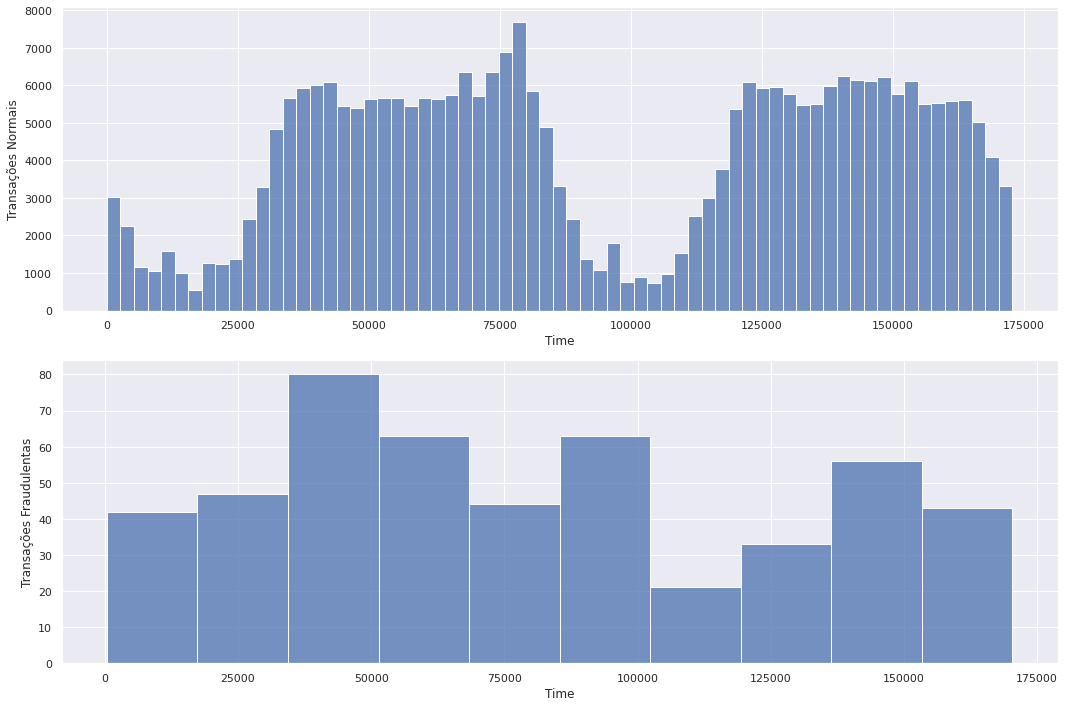

In [ ]:
# Plotando os histogramas para a variável Time
sns.set_theme()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Título para o histograma da variável Time
print("Histogramas da variável Time\n")

# Histograma de transações normais
sns.histplot(data=df_original.Time[df_original.Class==0], ax=ax[0])
ax[0].set_ylabel('Transações Normais')
ax[0].set_xlabel('Time')

# Histograma de transações fraudulentas
sns.histplot(data=df_original.Time[df_original.Class==1], ax=ax[1])
ax[1].set_ylabel('Transações Fraudulentas')
ax[1].set_xlabel('Time')

plt.tight_layout();
fig.savefig('histograma_time')


Observando os histogramas para a variável `Time`, podemos ver uma distribuição mais equilibrada, ou seja, sem valores discrepantes em relação ao resto dos dados.

Agora vamos ver se o mesmo ocorre com a variável `Amount`:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Histogramas da variável Amount



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

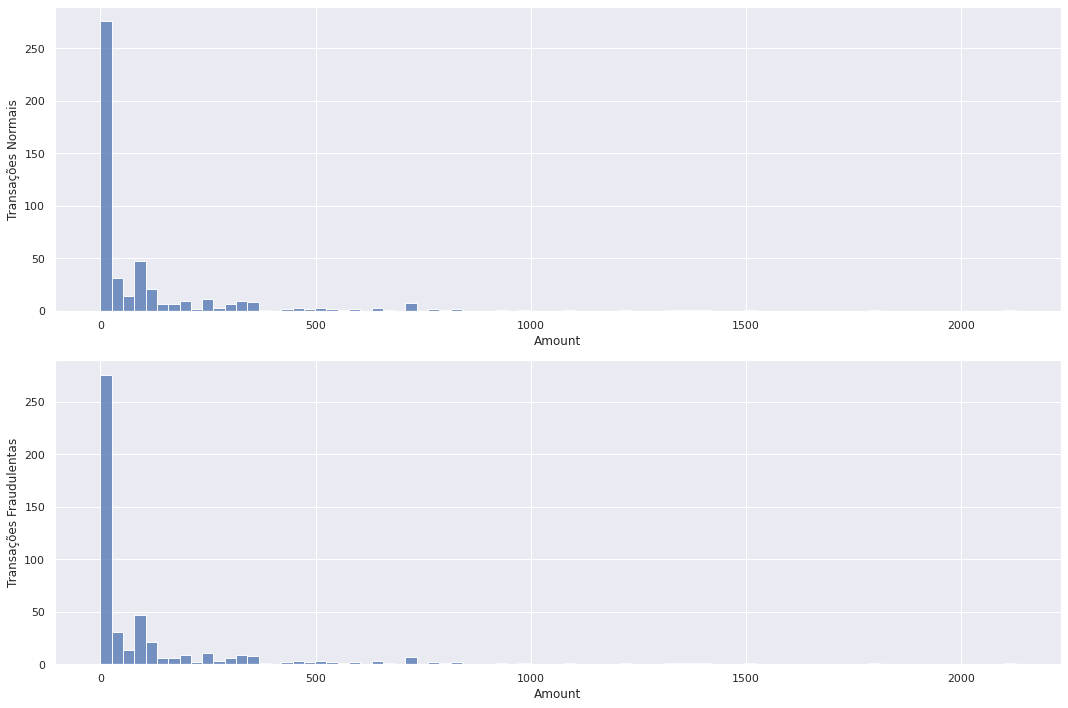

In [ ]:
# Plotando os histogramas para a variável Amount
sns.set_theme()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Título para o histograma da variável Amount
print("Histogramas da variável Amount\n")

# Histograma de transações normais
sns.histplot(data=df_original.Amount[df_original.Class==1], ax=ax[0])
ax[0].set_ylabel('Transações Normais')
ax[0].set_xlabel('Amount')

# Histograma de transações fraudulentas
sns.histplot(data=df_original.Amount[df_original.Class==1], ax=ax[1])
ax[1].set_ylabel('Transações Fraudulentas')
ax[1].set_xlabel('Amount')

plt.tight_layout();
fig.savefig('histograma_amount')

Como podemos ver nos histogramas acima, a variável `Amount` possui dados discrepantes, o que torna o histograma bastante desbalanceado, assim tornando bastante difícil a visualização de alguns dados no eixo X.

Essa diferença entre as variáveis pode afetar na qualidade do modelo de Machine Learning que será desenvolvido, então vamos precisar analisar os outliers mais profundamente com os boxplots. 

### Boxplot para a variável Amount

Os boxplots nos fornece uma melhor visualização da distribuição dos dados, destacando os dados discrepantes, ou seja, os outliers.

Vamos plotar os boxplots para as transações normais e fraudulentas:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

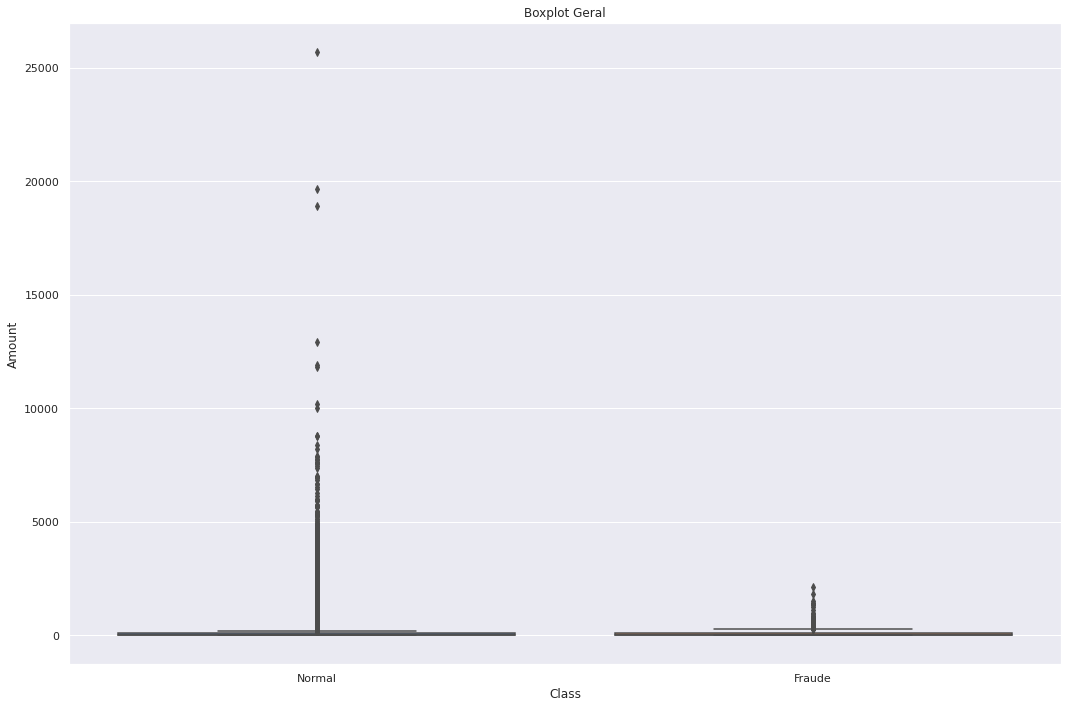

In [ ]:
# Plotando os boxplots para a variável Amount
sns.set_theme()
fig, ax = plt.subplots(figsize=(15,10))

# Boxplots
sns.boxplot(x=df_original.Class, y=df_original.Amount, ax=ax).set_title('Boxplot Geral')
plt.xticks([0,1],['Normal','Fraude']) # substitui a legenda das classes

plt.tight_layout();
# fig.savefig('boxplot_amount_g')

O boxplot acima mostra a proporção dos outliers em um todo, mas não é muito detalhista, então vamos limitar o eixo Y para isso:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

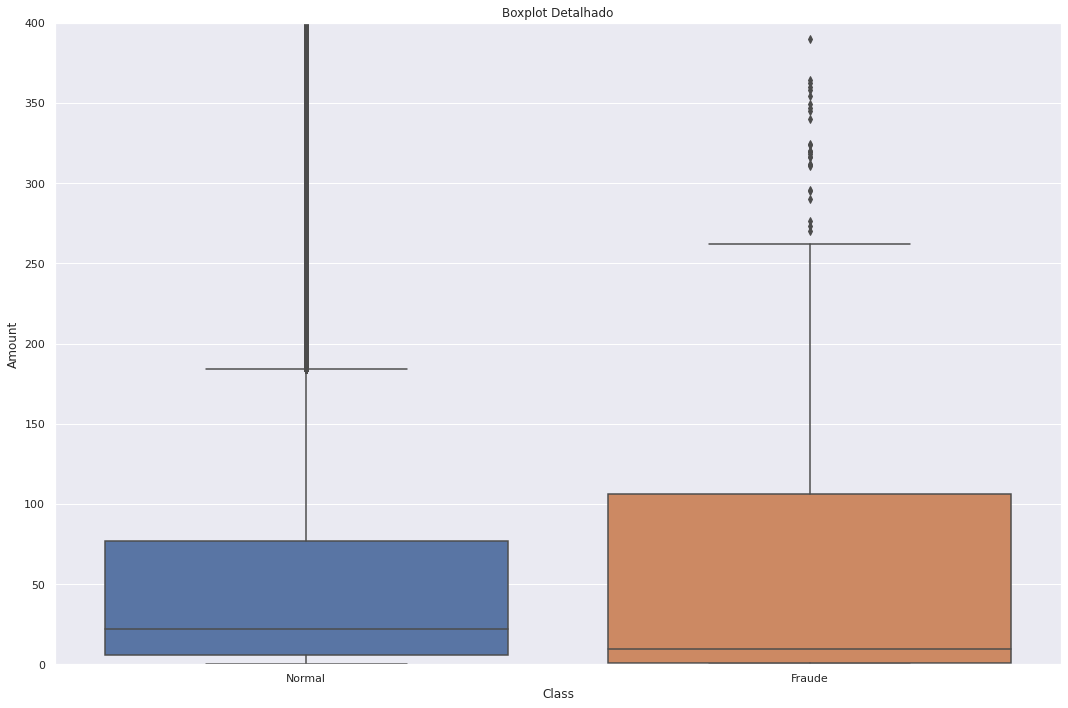

In [ ]:
# Plotando os boxplots para a variável Amount limitando o eixo Y para mais detalhes
sns.set_theme()
fig, ax = plt.subplots(figsize=(15,10))

# Boxplot com limite y=[0:400]
sns.boxplot(x=df_original.Class, y=df_original.Amount, ax=ax).set_title('Boxplot Detalhado')
plt.xticks([0,1],['Normal','Fraude']) # substitui a legenda das classes
plt.ylim((0,400)) # definindo o limite no eixo Y de 0 até 400

plt.tight_layout();
fig.savefig('boxplots_amount_d')

Sabendo que os outliers vão afetar a qualidade do modelo de machine learning e tendo visualizado a proporção destes pelos boxplots, teremos que tratar esses dados.

## Tratamento e Preparação dos Dados

O modelo de Machine Learning é influenciado pelos dados, então como vimos que há a necessidade de tratamento, vamos fazer os ajustes e então preparar esses dados para o desenvolvimento do modelo.

### Padronização de Time e Amount

Visto os histogramas e boxplots, temos que padronizar as variáveis `Time` e `Amount`:


In [ ]:
# Copiando o dataset original para o tratamento
df_clean = df_original.copy()

# Padronização das variáveis Time e Amount com StandardScaler
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

# Remover as antigas variáveis Time e Amount do DataFrame
df_clean.drop(['Time','Amount'], axis=1, inplace=True)

# Checando as primeiras entradas do novo DataFrame
df_clean.head()

<IPython.core.display.Javascript object>

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Dividir o conjunto de dados entre treino e teste

Agora que os dados foram padronizados, vamos separá-los entre dados de treino e teste, lembrando que a variável alvo é `Class`.

In [ ]:
# Dividindo os dados entre X e Y
X = df_clean.drop('Class', axis=1) # todas as variáveis exceto a alvo
Y = df_clean['Class']

# Dividindo os dados entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y) # stratify mantem a mesma quantidade de classes para treino e teste

<IPython.core.display.Javascript object>

### Balancear o conjunto de dados

Agora que os dados foram separados entre treino e teste, podemos realizar o balanceamento dos dados.

Para o balanceamento dos dados, vamos utilizar para este projeto o Under_sampling da biblioteca `imblearn`, que preserva a classe minoritária dos dados.

In [ ]:
# Balanceamento com Under_sampling
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_sample(X_train, Y_train)

# Checando o balanceamento
print(pd.Series(Y_rus).value_counts())

<IPython.core.display.Javascript object>

1    369
0    369
dtype: int64


Agora com o balanceamento podemos notar uma grande diferença com esses dados novos em relação aos originais, quando tínhamos:
* Antes:
 * 284.315 Transações Normais;
 * 492 Transações Fraudulentas.

* Após o balanceamento:
 * 369 Transações Normais e Fraudulentas.

Comparando em gráficos:



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

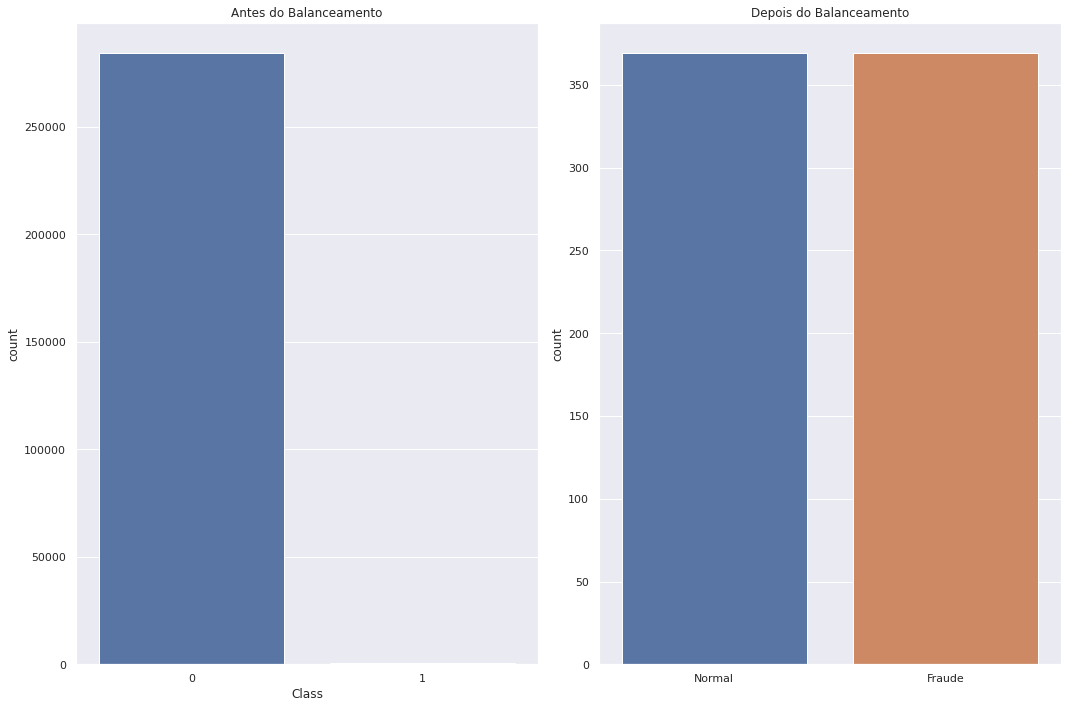

In [ ]:
# Plotar os gráficos com as informações acima para comparação
sns.set_theme()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

# Gráfico Antes do Balanceamento
sns.countplot('Class', data=df_original, ax=ax[0])
ax[0].set_title('Antes do Balanceamento')

# Gráfico Depois do Balanceamento
sns.countplot(Y_rus, ax=ax[1])
ax[1].set_title('Depois do Balanceamento')
plt.xticks([0,1],['Normal','Fraude']) # substituindo as legendas de classe 0 e 1 pelas transações

plt.tight_layout();
fig.savefig('comparacao_balanceamento')

Comparando os gráficos acima, vemos a grande diferença que foi feita nos dados, onde antes não era possível ver absolutamente nada em fraudes devido à proporção discrepante.

### Plotar Matriz de Correlação

Agora que os dados foram balanceados, podemos plotar uma matriz de correlação e observar quais variáveis estão mais relacionadas umas com as outras.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

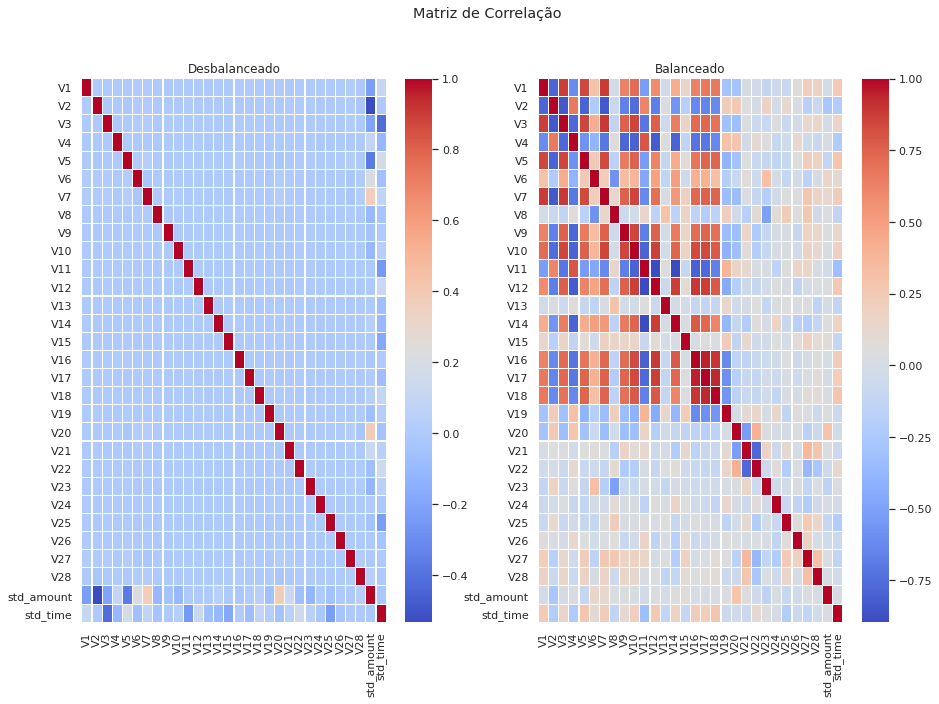

In [ ]:
# Plotando a matriz de correlação
corr = X_train.corr() # X_train desbalanceado
corr_rus = pd.DataFrame(X_rus).corr() # X_train balanceado

sns.set_theme()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
fig.suptitle('Matriz de Correlação')

# Heatmap Desbalanceado
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Desbalanceado')

# Heatmap Balanceado
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Balanceado')

plt.show();
fig.savefig('matriz_correlacao')

Analisando as matrizes acima, vemos a diferença que o balanceamento causou nas relações entre as variáveis, o que é benéfico para o modelo de Machine Learning que será desenvolvido agora.

## Escolhendo um Modelo de Machine Learning

O nosso projeto se baseia em um problema de **classificação**, que é definir se uma transação **é ou não é** uma fraude. Dito isso, para resolvê-lo, devemos escolher um estimador de Machine Learning, que no caso, existem vários como: Regressão Logística, Árvore de Decisões, Máquina de Vetor de Suport, Naive Bayes, etc...

Cada estimador tem suas vantagens e desvantagens, então cabe a nós decidir qual que se **adapta** melhor para resolver nosso problema.

Quando vamos desenvolver um modelo de Machine Learning, sempre há uma preocupação com o **overfitting**, que é um problema em que o modelo não consegue **generalizar** novos dados, assim sendo excelente para o conjunto de treino mas horrível para um conjunto novo.

Para evitar o *overfitting*, vamos utilizar o método da **Validação Cruzada** e evitar de usar nossos dados de teste em primeiro momento, assim não corremos o risco de treinar e testar nosso modelo em cima dos mesmos dados.

Vamos testar os estimadores: Regressão Logística, Árvore de Decisão de Classificação, Máquina de Vetor de Suporte - especificamente C-Support Vector Classification, e Random Forest. 

In [ ]:
# Definindo o seed
np.random.seed(10)

# Dividindo os dados de treino em 5 partes(folds)
cv = StratifiedKFold(n_splits = 5, shuffle = True)

# Estimadores de Machine Learning
model_reg  = LogisticRegression() # Regressão Logística
model_tree = tree.DecisionTreeClassifier(min_samples_leaf=34, random_state=10) # Árvore de Decisão de Classificação
model_svc  = SVC() # Máquina de Vetor de Suporte (C-Support Vector Classification)
model_rand = RandomForestClassifier(n_estimators=100) # Random Forest

# Automatizando os testes
modelos = [model_reg, model_tree, model_svc, model_rand]
nomes = ['Regressão Logística','Árvore de Decisão','Máquina de Vetor de Suporte','Random Forest']

contador = 0
for i in modelos:
  np.random.seed(10)
  acuracia = cross_val_score(i, X_rus, Y_rus, cv=cv, scoring = 'accuracy')
  media_acu = acuracia.mean()
  desvio_acu = acuracia.std()
  print('Acurácia média do Modelo {}: {:.4f}%'.format(nomes[contador], media_acu*100))
  print('Intervalo de acurácia: {:.2f}% ~ {:.2f}%\n'.format((media_acu - 2*desvio_acu)*100, (media_acu + 2*desvio_acu)*100))
  print('-------------------------------------------------------\n')
  contador += 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Acurácia média do Modelo Regressão Logística: 94.3050%
Intervalo de acurácia: 90.39% ~ 98.22%

-------------------------------------------------------



<IPython.core.display.Javascript object>

Acurácia média do Modelo Árvore de Decisão: 90.5130%
Intervalo de acurácia: 85.56% ~ 95.46%

-------------------------------------------------------



<IPython.core.display.Javascript object>

Acurácia média do Modelo Máquina de Vetor de Suporte: 93.6312%
Intervalo de acurácia: 92.96% ~ 94.30%

-------------------------------------------------------



<IPython.core.display.Javascript object>

Acurácia média do Modelo Random Forest: 93.3591%
Intervalo de acurácia: 90.72% ~ 96.00%

-------------------------------------------------------



Os modelos nos forneceram as seguintes acurácias:

* Modelo de Regressão Logística:
 * Acurácia média do modelo: 93.6266%
 * Intervalo de acurácia: 90.54% ~ 96.71%

* Modelo de Árvore de Decisão:
 * Acurácia média do modelo: 91.1877%
 * Intervalo de acurácia: 86.54% ~ 95.84%

* Modelo de Máquina de Vetor de Suporte:
 * Acurácia média do modelo: 91.8652%
 * Intervalo de acurácia: 87.89% ~ 95.84%

* Modelo de Random Forest:
 * Acurácia média do modelo: 93.4933%
 * Intervalo de acurácia: 90.81% ~ 96.18%

É importante ressaltar que a métrica `accuracy`, sozinha, não é eficiente para **avaliar** um modelo, assim sendo necessário observar **outras métricas** para complementar seu direcionamento na escolha do modelo. Entretanto como nosso **conjunto de dados está balanceado**, a acurácia se torna uma boa medida de avaliação, sendo assim vamos usar o modelo de Regressão Logística, que obteve melhor resultado.

Como foi dito, existem outras métricas que são importantes para avaliar um modelo, e é bastante importante para o modo que queremos tratar nosso problema, que são as métricas `precision` e `recall`.

Com o Modelo de Regressão Logística em mente, vamos plotar a Matriz de Confusão para visualizarmos os acertos e o Relatório de Classificação para analisarmos as métricas ditas acima:




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9177    0.9675    0.9420       369
           1     0.9656    0.9133    0.9387       369

    accuracy                         0.9404       738
   macro avg     0.9417    0.9404    0.9403       738
weighted avg     0.9417    0.9404    0.9403       738



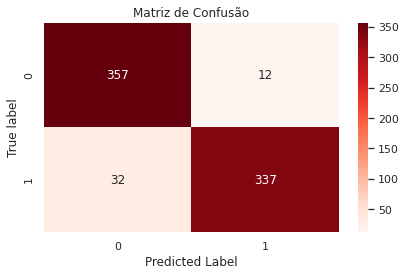

In [ ]:
# Definindo o seed
np.random.seed(17)

# Definindo o modelo
modelo = LogisticRegression(solver='liblinear')

# Previsões do modelo
y_pred = cross_val_predict(modelo, X_rus, Y_rus, cv = cv)

# Matriz de Correlação
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(Y_rus, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão")
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()
fig.savefig('matriz_confusao1')

# Relatório de Classificação
print('Relatório de classificação:\n', classification_report(Y_rus, y_pred, digits=4))

Analisando as informações acima, temos que para a classe alvo, o modelo obteve 94% de precisão e 90% de recall, mas o que isso quer dizer? 

Antes de responder a essa pergunta, precisamos entender o que engloba nosso problema.

### Entendendo nosso Problema

Para definir um bom modelo de Machine Learning, temos que **entender nosso problema e as dores que ele causa**.

Como dito no início do projeto, as fraudes causam grandes prejuízos tanto para as instituições financeiras quanto para os clientes.

Quem já passou ou conhece alguém que teve seu cartão fraudado, sabe o **desgaste físico e psicológico** vivido durante aquele período. Também há aqueles que durante um pagamento teve seu cartão recusado, o que causou **constrangimento e medo** de algo ter acontecido, mas no fim acaba que foi apenas um alarme falso, estas são dores reais que o problema com as transações fraudulentas causam.

Essas duas situações são **negativas** para as instituições financeiras, afinal além do **prejuízo financeiro** para o primeiro caso, há a **perda da confiança do cliente** com a instituição em ambas, o que pode acarretar na perda deste para a instituição.

Nestes dois exemplos podemos ver as dores causadas pelo problema de fraude, e para nosso modelo eles são retratados nas métricas `precision` e `recall`.

Respondendo a pergunta sobre o que essas métricas querem dizer, vamos nos atentar a este exemplo:

Um modelo obteve em média 90% de precisão e 80% de recall, quando ele é implementado por uma instituição, ele prevê que 100 transações são fraudulentas. De acordo com as métricas obtidas, pela precisão, destas 100 transações fraudulentas, 10 são normais e o modelo falhou em classificá-las. Pelo recall, de 100 transações fraudulentas, 20 serão consideradas normais.

Essas duas métricas funcionam **semelhante a uma balança**, ou seja, se temos uma precisão alta, nosso recall será baixo, ou vice-versa. Então sempre devemos **analisar e pesar as consequências** que os falsos positivos e negativos vão causar e definir qual métrica se adequa melhor para solucionar o problema.

Situando com as dores descritas, qual seria **mais prejudicial** para o cliente: passar por constrangimento momentâneo ou ter um prejuízo financeiro surpresa no fim do mês?

Para **nosso problema em específico**, ter mais acertos em relação às transações fraudulentas é melhor do que ter mais compras bloqueadas por engano, ou seja, é mais conveniente ter um `recall` maior.

### Precisão x Recall 

Como foi dito, a relação entre precisão x recall é semelhante a uma balança, se aumentarmos um, diminuímos o outro. É importante lembrar que a situação dos **falsos positivos e negativos são ambas negativas** para as instituições, então simplesmente ter um modelo com **recall altíssimo vai gerar outro problema**, uma grande quantidade de transações bloqueadas, acusadas como fraudes de forma errada. Assim, mesmo buscando um bom recall para nosso modelo, devemos tentar **nivelar** com a precisão.

Para encontrar as melhores métricas para nosso modelo, vamos plotar o gráfico da relação destas para cada valor de decisão(threshold) que ele calcula:



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

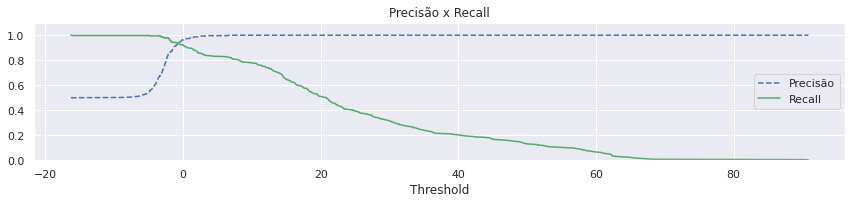

In [ ]:
# Determinando as scores para as funções de decisão
y_scores = cross_val_predict(modelo, X_rus, Y_rus, cv=cv, method='decision_function')

# Separando as scores
precisions, recalls, thresholds = precision_recall_curve(Y_rus, y_scores)

# Plotando o gráfico de relação entre precisão e recall
fig, ax = plt.subplots(figsize=(12,3))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1.1])
plt.title('Precisão x Recall')
plt.tight_layout();
fig.savefig('precisao_x_recall')

O gráfico **comprova o trade-off** entre precisão e recall, e nos mostra os valores das métricas para cada threshold, o que facilita nossa busca pelas métricas adequadas.

Olhando esse gráfico, podemos perceber um ponto de interseção interessante para nosso caso, em que as duas métricas se encontram acima de 90% por volta do threshold -1.

Vamos checar essas métricas entre os valores de thresholds -3 e -1:

In [ ]:
# Definindo os scores para os thresholds
y_train_pred_recall = (y_scores > -3)

print('Precisão para -3: {:.4f}'.format(precision_score(Y_rus, y_train_pred_recall)))
print('Recall para -3: {:.4f}'.format(recall_score(Y_rus, y_train_pred_recall)))

Precisão para -3: 0.7123
Recall para -3: 0.9864


In [ ]:
# Definindo os scores para os thresholds
y_train_pred_recall = (y_scores > -2)

print('Precisão para -2: {:.4f}'.format(precision_score(Y_rus, y_train_pred_recall)))
print('Recall para -2: {:.4f}'.format(recall_score(Y_rus, y_train_pred_recall)))

Precisão para -2: 0.8606
Recall para -2: 0.9702


In [ ]:
# Definindo os scores para os thresholds
y_train_pred_recall = (y_scores > -1)

print('Precisão para -1: {:.4f}'.format(precision_score(Y_rus, y_train_pred_recall)))
print('Recall para -1: {:.4f}'.format(recall_score(Y_rus, y_train_pred_recall)))

Precisão para -1: 0.9229
Recall para -1: 0.9404


Então obtivemos entre -3 e -1:
* Para o threshold -3:
 * Precisão: 67,9%
 * Recall: 98,6%
* Para o threshold -2:
 * Precisão: 81,2%
 * Recall: 96,2%
* Para o threshold -1:
 * Precisão: 91,9%
 * Recall: 92,9%

Para o threshold -1, ambas as métricas estão acima de 90% como o esperado, porém como queremos uma taxa de recall alta para nosso modelo, os threshols -3 e -2 apresentaram uma melhora significante, e levando em consideração que um **recall alto pode resolver um lado do problema** e uma **precisão baixa pode acentuar o outro**, vamos optar pelo threshold -2.

Agora que temos um recall de 96% e precisão de 81%, **podemos considerar nosso modelo como bom**? Ainda não é possível responder a essa pergunta, pois para **avaliar a qualidade de algo**, precisamos de um **comparativo**, que no nosso caso seria outro modelo de Machine Learning.

### Comparando o modelo escolhido

Anteriormente com a métrica `accuracy`, conseguimos estabelecer um certo desempenho para cada modelo, então vamos usar o segundo melhor nessa medida, que foi Random Forest, para ser nosso comparador.

Para comparação de modelos de Mechine Learning, temos uma ferramenta bastante comum que é a **Curva ROC** (Curva das Características Operacionais do Receptor - Receiver Operating Characteristic), que nos mostra a relação entre a **taxa de verdadeiros positivos** (TPR - sigla em inglês) e a **taxa de falsos positivos** (FPR - sigla em inglês).

A métrica que usaremos para decidir a qualidade dos modelos será a **área sob a curva ROC** (AUC - sigla em inglês), que quanto mais perto do valor 1, **melhor** é o modelo.

Vamos então calcular essa métrica `AUC` para nosso modelo de Regressão Logística e então para o Random Forest:

In [ ]:
# Como já temos os scores para Regressão Logística
print('AUC - Regressão Logística: {:.4f}'.format(roc_auc_score(Y_rus, y_scores)))

# Para o modelo Random Forest precisamos calcular os scores
y_prob_forest = cross_val_predict(model_rand, X_rus, Y_rus, cv=cv, method='predict_proba')
y_scores_forest = y_prob_forest[:,1]

print('AUC - Random Forest: {:.4f}'.format(roc_auc_score(Y_rus, y_scores_forest)))

AUC - Regressão Logística: 0.9805
AUC - Random Forest: 0.9796


Interessante notar que os dois modelos se aproximaram bastante, mas o nosso modelo de Regressão Logística se saiu um pouco melhor.

### Testando o Modelo

Agora que comparamos os modelos e chegamos à conclusão de que o nosso de Regressão Logística foi **superior** aos outros, vamos ver como ele se sai com **novos dados**, que será o conjunto de teste separado pela validação cruzada e que evitamos usar durante a **avaliação do modelo**.

É importante lembrar que escolhemos o threshold de valor -2 para nossas métricas, mas antes vamos testar o modelo para o threshold padrão, que é zero:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9675    0.9834     71079
           1     0.0450    0.8862    0.0857       123

    accuracy                         0.9673     71202
   macro avg     0.5224    0.9268    0.5346     71202
weighted avg     0.9981    0.9673    0.9818     71202



<IPython.core.display.Javascript object>

AUC: 0.9268



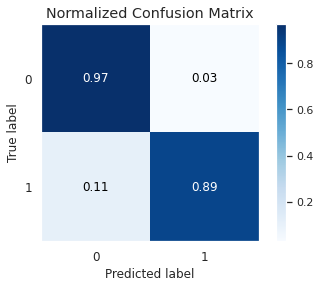

In [ ]:
# Definindo seed fixo
np.random.seed(40)

# Definindo o modelo final
modelo_final = LogisticRegression(solver='liblinear')
modelo_final.fit(X_rus, Y_rus)

# Previsões
y_pred_final = modelo_final.predict(X_test)

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, y_pred_final, digits=4))

# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_final, normalize=True);
plt.savefig('matriz_confusao2')

# Área sob a curva(AUC)
print('AUC: {:.4f}\n'.format(roc_auc_score(Y_test, y_pred_final)))


Nosso modelo testado com novos dados, obteve um recall de 89% para a classe alvo com threshold 0, agora vamos comparar com o modelo de threshold -2:

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.8042    0.8914     71079
           1     0.0083    0.9431    0.0164       123

    accuracy                         0.8044     71202
   macro avg     0.5041    0.8736    0.4539     71202
weighted avg     0.9982    0.8044    0.8899     71202



<IPython.core.display.Javascript object>

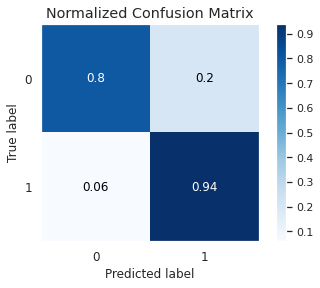

In [ ]:
# Calculando as scores do modelo final para o conjunto de teste
y_scores_final = modelo_final.decision_function(X_test)

# Previsão
y_test_pred_recall = (y_scores_final > -2)

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, y_test_pred_recall, digits=4))

# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(Y_test, y_test_pred_recall, normalize=True);
plt.savefig('matriz_confusao3')

Com o threshold de -2, conseguimos **subir o recall** para a variável alvo de 89% para 95%, o que quer dizer que nosso modelo vai errar mais quando **apontar** transações como fraudulentas, mas vai errar bem menos quando forem **realmente** casos de fraude.

# Conclusão

Como contextualizado no início deste projeto, mesmo as fraudes tendo acompanhado a transformação da "moeda" para o meio virtual, **é possível se proteger** destes crimes com técnicas de Machine Learning para detecção, como a que desenvolvemos no projeto.

No desenvolvimento do nosso modelo, mesmo tendo-o avaliado em ralação à outros, deve-se ter em mente que existem outros meios de **melhorar** cada modelo testado, como por exemplo se **aprofundar nas métricas e parâmetros** de cada um e no fim ter mais assertividade na escolha do mais **adequado** para nosso problema.

Como o **objetivo** deste projeto era fazer uma análise explanatória do problema com fraudes em cartões de crédito, não me aprofundei, de fato em encontrar o modelo de Machine Learning "perfeito", mas desenvolver um que tenha **resultados satisfatórios**.

Para desenvolvermos um algoritmo de Machine Learning temos que nos **atentar** a diversas questões, como por exemplo: **entender o que é o nosso problema e o que ele causa**, quando nosso modelo acerta ou erra uma previsão, a qualidade dos dados para **alimentar** o modelo, determinar qual é o **melhor estimador** para o problema, entre vários outros.

Quando buscamos entender nosso problema, vimos que ele funcionava como uma balança, em que os dois pêndulos são negativos para o cliente e a instituição, porém decidimos que **é melhor** ter uma transação bloqueada, **por segurança**, e passar por um constrangimento no momento, do que ter uma **surpresa** no fim do mês quando recebemos **cobranças inesperadas**, assim tendo prejuízos **mais severos**.

Para este fim nosso modelo alcançou uma acertividade de 95% nos casos onde ocorreram transações fraudulentas ao custo de que mais transações normais serão erroneamente tratadas como fraudes.

# Referências

Recomendo bastante a leitura do artigo [Como avaliar seu modelo de classificação](https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classificação-34e6f6011108), de Marcelo Randolfo (2020), que apresenta sete passos para se fazer uma boa avaliação do seu modelo de classificação.



